In [1]:
import numpy    as np

from openpyxl                 import load_workbook
from openpyxl.worksheet.table import Table, TableStyleInfo

BasePath = './'            # This should point to the Excel file directory

#
# Excel file and sheet containing the horizontal KB mirror metrology
#
HorMirror = ['M4K3_Tangential_shape_error_and_slope_error.xlsx',
             'Tan shape error']

#
# Excel file and sheet containing the vertical KB mirror metrology
#
VerMirror = ['M3K3_Tangential_shape_error_and_slope_error.xlsx',
             'Tangential shape error']


In [2]:
#
# This function will load the sheet containing the height errors from the metrology spreadsheet
#
# There are multiple lines of measurement along the length of the mirror. Those are listed in "labels"

def load_metrology( mirror ):
    wb = load_workbook(BasePath + mirror[0], read_only=True)
    ws = wb[mirror[1]]

    data = np.zeros([ws.max_row-1, ws.max_column])

    for (i,row) in enumerate(ws.values, start=-1):
        if(i < 0):
            labels = row
        else:
            data[i,:] = row
    
    return labels,data

def saveToWPG(fname,data):
    hd = data[:,4]
    x = data[:,0]
    out_array = np.vstack((x[~np.isnan(hd)]*1e-3, hd[~np.isnan(hd)]*1e-9))
    np.savetxt(fname,out_array.T)

In [3]:
#
# These are default plot parameters I use
#

import matplotlib.pyplot as plt

FigSize = [24,12]
FigPos = [0.2,0.125,0.5625,0.75]
label_parms = {'fontsize':22, 'fontweight':'bold', 'labelpad':20}

HeavyLine  = 3
MediumLine = 2
ThinLine   = 1

TickLabels = {'fontsize':16,'fontweight':'bold'}
TickParms  = {'direction':'in', 'length':15, 'width':2}
AxisParms  = {'linewidth':3}
LegndParms = {'loc':'upper right', 'title_fontsize':18, 'fontsize':16, 'frameon':False}

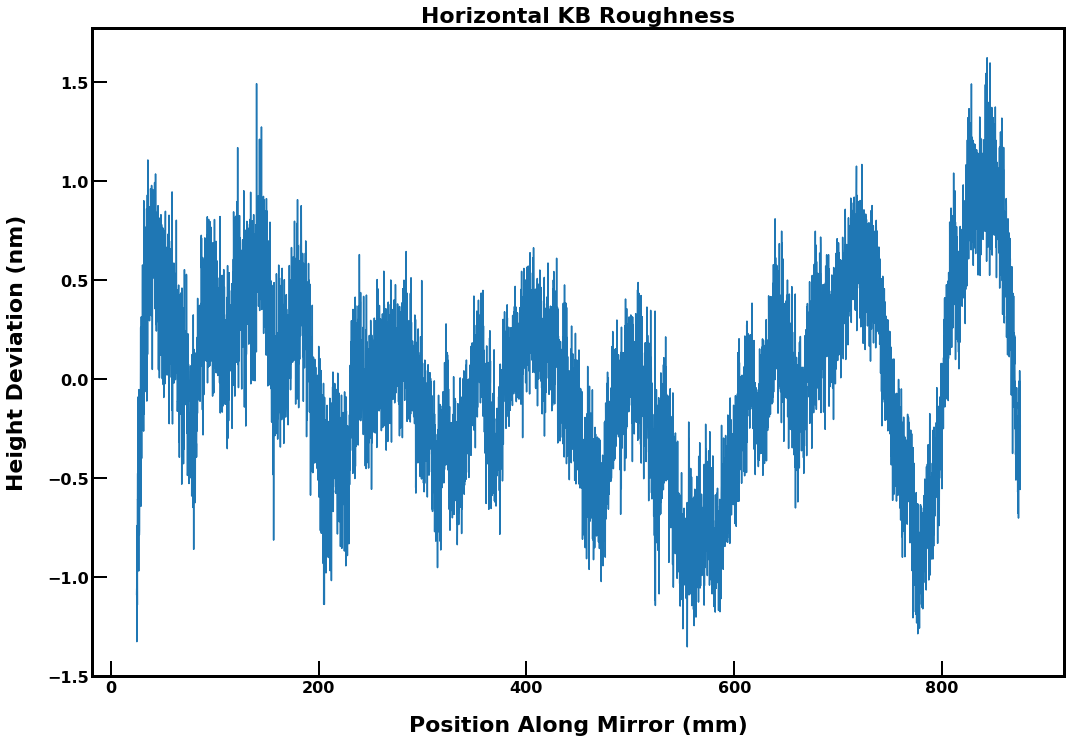

In [4]:
# PLOT HORIZONTAL HEIGHT ERROR

# Get the data

labels,data = load_metrology( HorMirror )

# Plot the center line data

fig, ax1 = plt.subplots(figsize=FigSize)
ax1.set_position(FigPos)

dum = plt.plot( data[:,0], data[:,4])
dum = plt.xlabel('Position Along Mirror (mm)',**label_parms)
dum = plt.ylabel('Height Deviation (nm)',**label_parms)
dum = plt.title('Horizontal KB Roughness',fontsize=22, fontweight='bold')

plt.xticks(**TickLabels)
plt.yticks(**TickLabels)
plt.setp(ax1.spines.values(), **AxisParms)
ax1.tick_params(**TickParms)

saveToWPG('HorMirror_M4K3.dat',data)

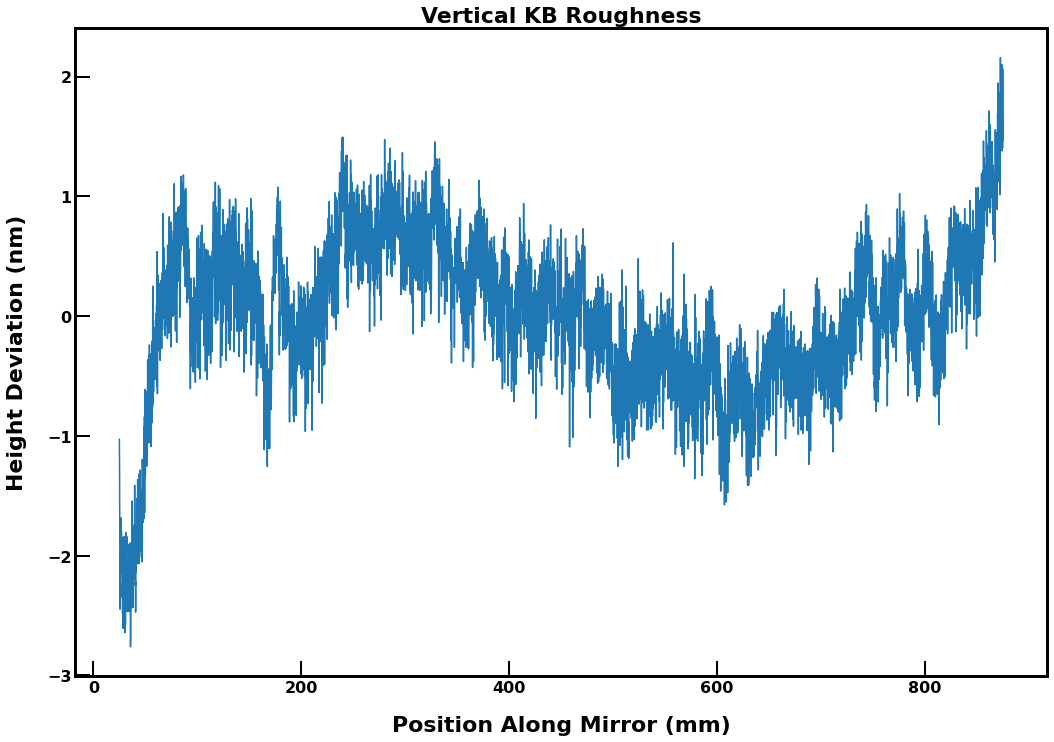

In [5]:
# PLOT VERTICAL HEIGHT ERROR

# Get the data

labels,data = load_metrology( VerMirror )

# Plot the center line data

fig, ax1 = plt.subplots(figsize=FigSize)
ax1.set_position(FigPos)

dum = plt.plot( data[:,0], data[:,4])
dum = plt.xlabel('Position Along Mirror (mm)',**label_parms)
dum = plt.ylabel('Height Deviation (nm)',**label_parms)
dum = plt.title('Vertical KB Roughness',fontsize=22, fontweight='bold')

plt.xticks(**TickLabels)
plt.yticks(**TickLabels)
plt.setp(ax1.spines.values(), **AxisParms)
ax1.tick_params(**TickParms)

saveToWPG('VerMirror_M3K3.dat',data)

In [6]:
wpg_data_path = '../wpg-samples/data_common/mirror2.dat'
heightProfData = np.loadtxt(wpg_data_path).T

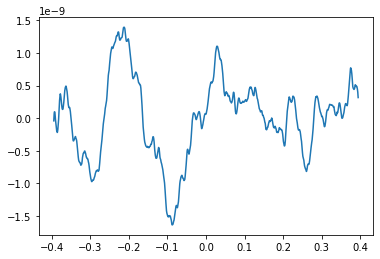

In [7]:
plt.plot(heightProfData[0],heightProfData[1])